<a href="https://colab.research.google.com/github/PraveenKumar-pk-star/DS-corrected-file/blob/main/Copy_of_GoldPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Gold_data.csv')

In [3]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [4]:
df.columns = ['date', 'price']

df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)

In [5]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [6]:
# Check for missing values
df.isnull().sum()

,0
price,0


In [7]:
# Descriptive statistics
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


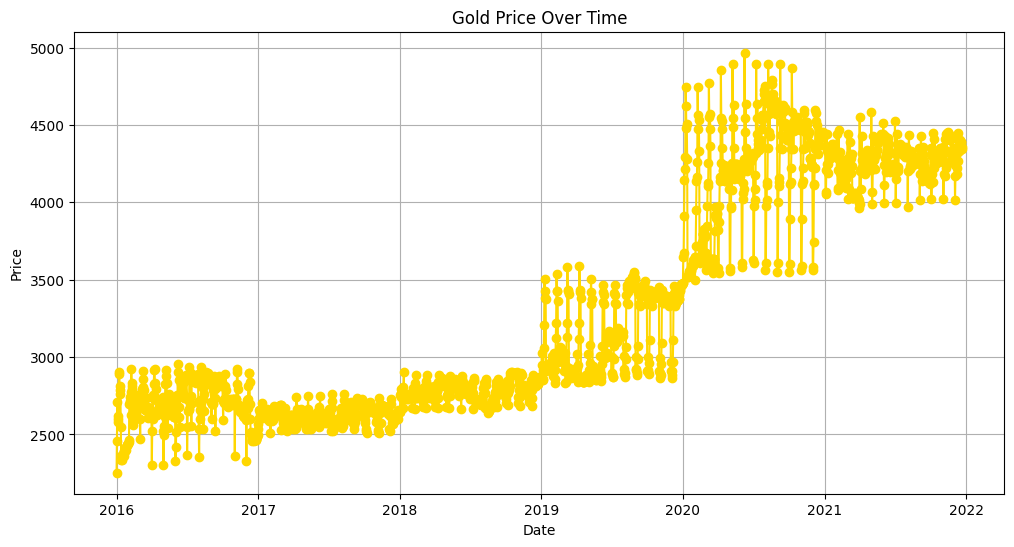

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['price'], marker='o', linestyle='-', color='gold')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

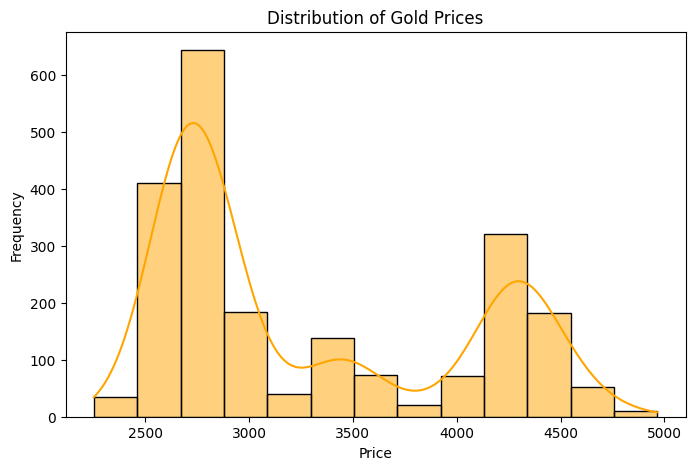

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, color='orange')
plt.title('Distribution of Gold Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Daily price change
df['price_change'] = df['price'].diff()

# Daily return (percentage change)
df['price_return'] = df['price'].pct_change() * 100

df[['price', 'price_change', 'price_return']].head()


,price,price_change,price_return
date,,,
2016-01-01,2252.60,NaN,NaN
2016-01-02,2454.50,201.90,8.962976
2016-01-03,2708.10,253.60,10.332043
2016-01-04,2577.80,-130.30,-4.811491
2016-01-05,2597.75,19.95,0.773916


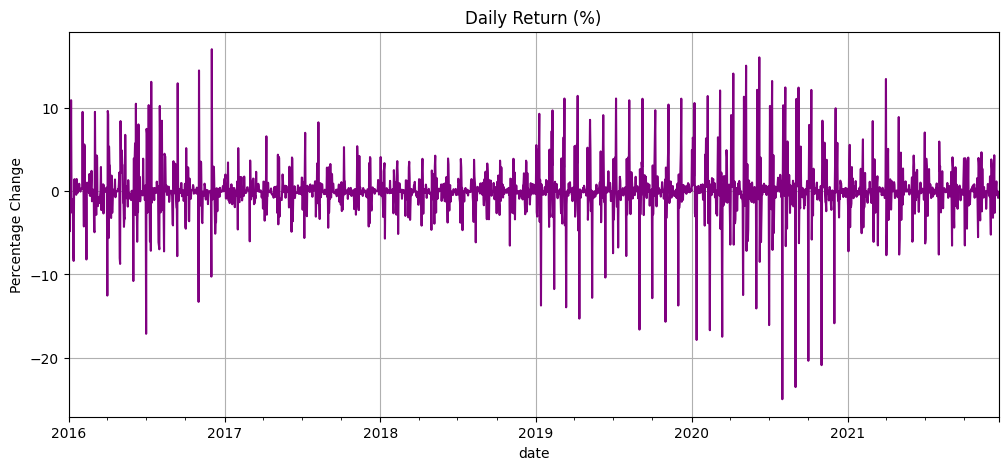

In [11]:
plt.figure(figsize=(12,5))
df['price_return'].plot(color='purple')
plt.title('Daily Return (%)')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()


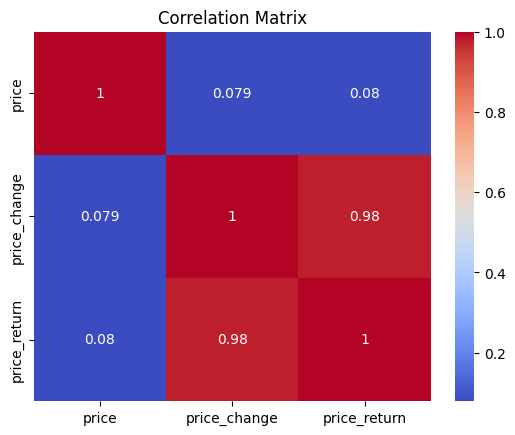

In [12]:
# For now it's only 'price', 'price_change', 'price_return'
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<ipython-input-13-880185ff1777>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['price'].resample('M').mean()


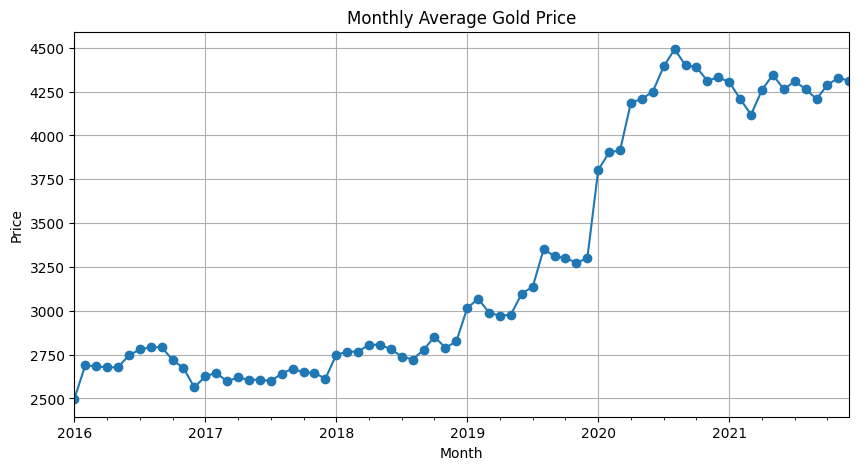

In [13]:
monthly_avg = df['price'].resample('M').mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(marker='o')
plt.title('Monthly Average Gold Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.show()

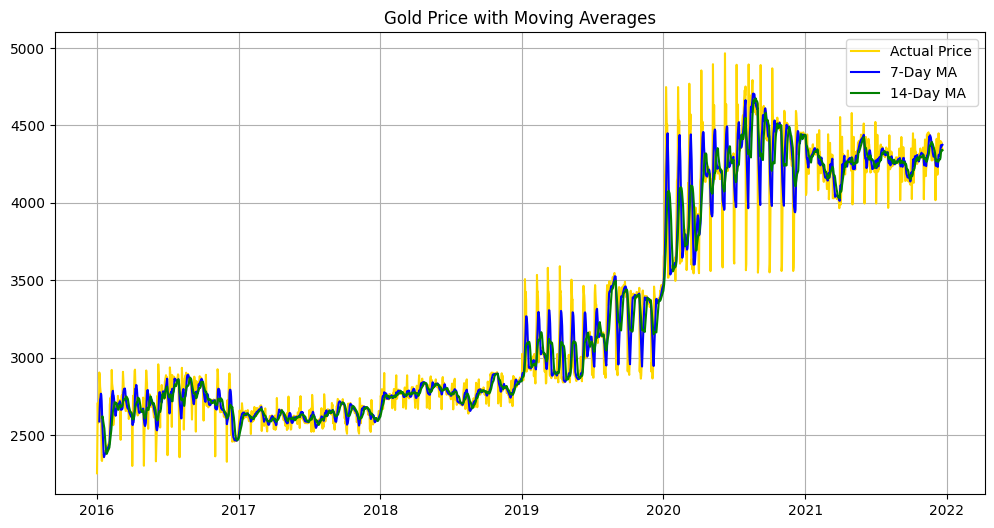

In [14]:
df['MA7'] = df['price'].rolling(window=7).mean()
df['MA14'] = df['price'].rolling(window=14).mean()

plt.figure(figsize=(12,6))
plt.plot(df['price'], label='Actual Price', color='gold')
plt.plot(df['MA7'], label='7-Day MA', color='blue')
plt.plot(df['MA14'], label='14-Day MA', color='green')
plt.title('Gold Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

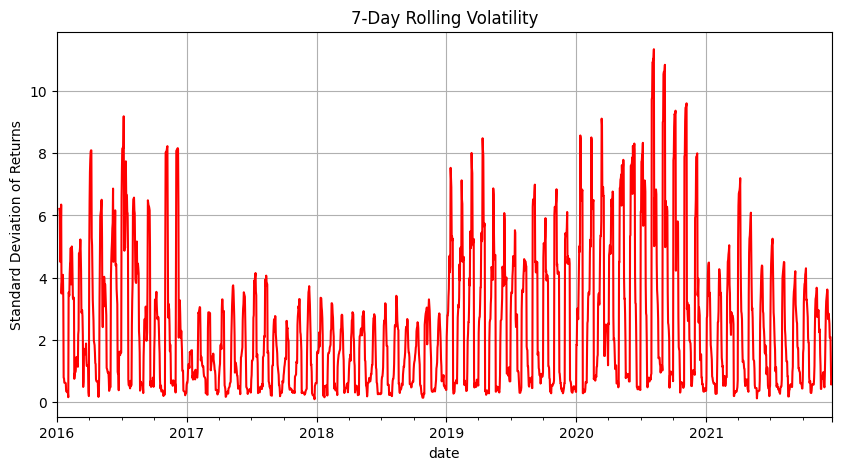

In [15]:
df['volatility'] = df['price_return'].rolling(window=7).std()

plt.figure(figsize=(10,5))
df['volatility'].plot(color='red')
plt.title('7-Day Rolling Volatility')
plt.ylabel('Standard Deviation of Returns')
plt.grid(True)
plt.show()

<ipython-input-16-06067bf06464>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_change = df['price'].resample('M').last().diff()


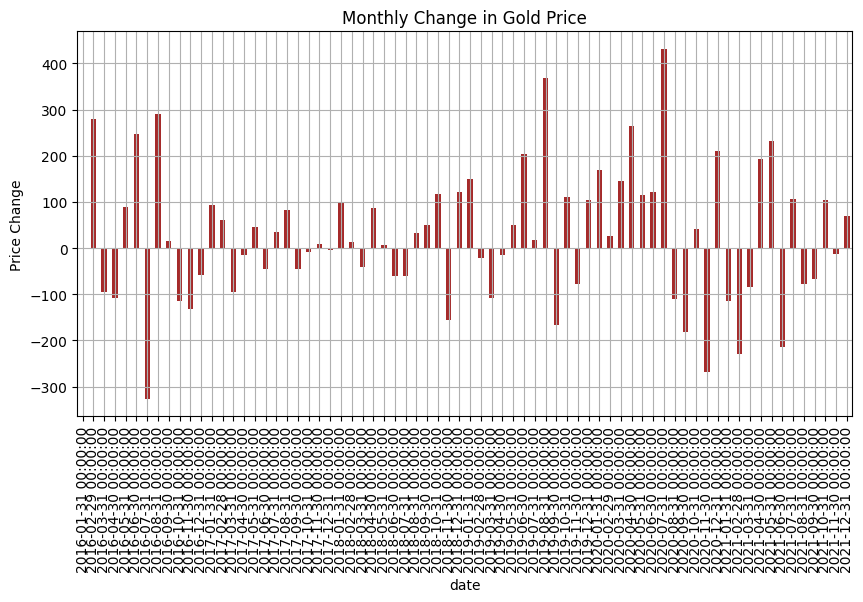

In [16]:
monthly_change = df['price'].resample('M').last().diff()

plt.figure(figsize=(10,5))
monthly_change.plot(kind='bar', color='brown')
plt.title('Monthly Change in Gold Price')
plt.ylabel('Price Change')
plt.grid(True)
plt.show()

In [17]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {len(outliers)}")
outliers


Number of outliers: 0


,price,price_change,price_return,MA7,MA14,volatility
date,,,,,,


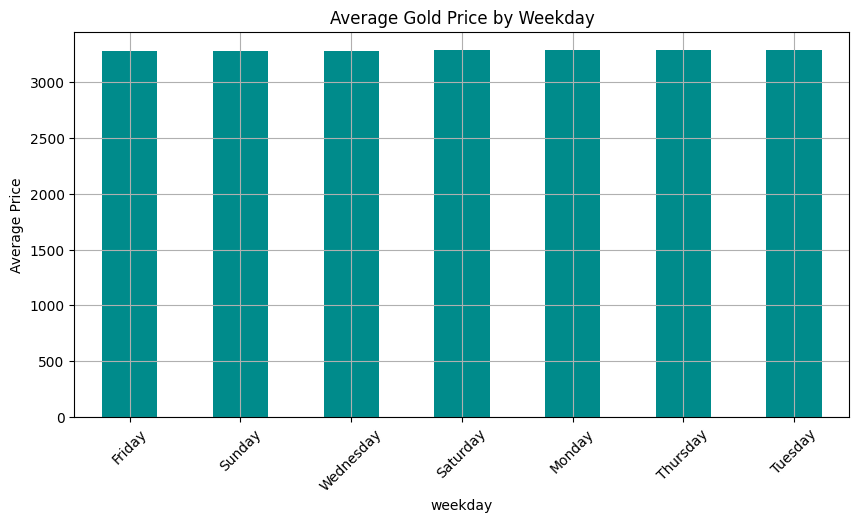

In [18]:
df['weekday'] = df.index.day_name()

weekday_avg = df.groupby('weekday')['price'].mean().sort_values()

plt.figure(figsize=(10,5))
weekday_avg.plot(kind='bar', color='darkcyan')
plt.title('Average Gold Price by Weekday')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [19]:
df.tail()

,price,price_change,price_return,MA7,MA14,volatility,weekday
date,,,,,,,
2021-12-17,4394.4,-5.4,-0.122733,4372.128571,4319.957143,2.083990,Friday
2021-12-18,4389.5,-4.9,-0.111506,4363.642857,4335.607143,1.195446,Saturday
2021-12-19,4389.5,0.0,0.000000,4371.642857,4341.607143,0.554999,Sunday
2021-12-20,4354.1,-35.4,-0.806470,4372.028571,4337.357143,0.654021,Monday
2021-12-21,4346.5,-7.6,-0.174548,4374.642857,4339.292857,0.617337,Tuesday


In [20]:
from sklearn.linear_model import LinearRegression
x = np.arange(len(df)).reshape(-1, 1)
y=df["price"]
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [21]:
future_x = np.arange(len(df), len(df) + 30).reshape(-1, 1)
future_preds = model.predict(future_x)


In [22]:
future_preds

array([4384.63841654, 4385.64637657, 4386.6543366 , 4387.66229663,
       4388.67025666, 4389.67821668, 4390.68617671, 4391.69413674,
       4392.70209677, 4393.7100568 , 4394.71801682, 4395.72597685,
       4396.73393688, 4397.74189691, 4398.74985694, 4399.75781697,
       4400.76577699, 4401.77373702, 4402.78169705, 4403.78965708,
       4404.79761711, 4405.80557713, 4406.81353716, 4407.82149719,
       4408.82945722, 4409.83741725, 4410.84537727, 4411.8533373 ,
       4412.86129733, 4413.86925736])

In [23]:
# Create future dates starting after the last date
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Create DataFrame for future predictions
future_df = pd.DataFrame({
    'date': future_dates,
    'predicted_price': future_preds
})

In [24]:
future_dates

DatetimeIndex(['2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31', '2022-01-01', '2022-01-02',
               '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14',
               '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', freq='D')

In [25]:
future_df

,date,predicted_price
0,2021-12-22,4384.638417
1,2021-12-23,4385.646377
2,2021-12-24,4386.654337
3,2021-12-25,4387.662297
4,2021-12-26,4388.670257
5,2021-12-27,4389.678217
6,2021-12-28,4390.686177
7,2021-12-29,4391.694137
8,2021-12-30,4392.702097
9,2021-12-31,4393.710057


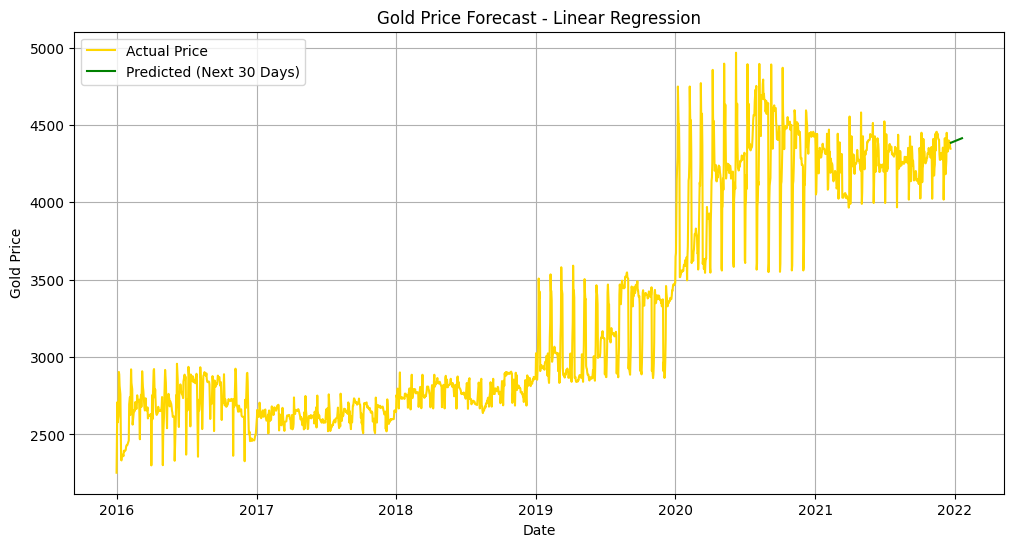

In [26]:
plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(df.index, df['price'], label='Actual Price', color='gold')

# Plot future predicted prices
plt.plot(future_df['date'], future_df['predicted_price'], label='Predicted (Next 30 Days)', color='green')

plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Forecast - Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 114433.85
R² Score: 0.78


In [28]:
# ARIMA


In [29]:
from statsmodels.tsa.arima.model import ARIMA


In [30]:
model_arima=ARIMA(df['price'],order=(1,1,1))
model_arima_fit=model_arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [31]:
y_pred = model_arima_fit.forecast(steps=30)
print(y_pred)


2021-12-22    4340.547832
2021-12-23    4335.900039
2021-12-24    4332.270776
2021-12-25    4329.436840
2021-12-26    4327.223940
2021-12-27    4325.495982
2021-12-28    4324.146693
2021-12-29    4323.093091
2021-12-30    4322.270378
2021-12-31    4321.627956
2022-01-01    4321.126317
2022-01-02    4320.734608
2022-01-03    4320.428740
2022-01-04    4320.189900
2022-01-05    4320.003401
2022-01-06    4319.857771
2022-01-07    4319.744055
2022-01-08    4319.655259
2022-01-09    4319.585922
2022-01-10    4319.531780
2022-01-11    4319.489502
2022-01-12    4319.456490
2022-01-13    4319.430712
2022-01-14    4319.410583
2022-01-15    4319.394865
2022-01-16    4319.382591
2022-01-17    4319.373008
2022-01-18    4319.365524
2022-01-19    4319.359680
2022-01-20    4319.355117
Freq: D, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'AIRMA model price predcition')

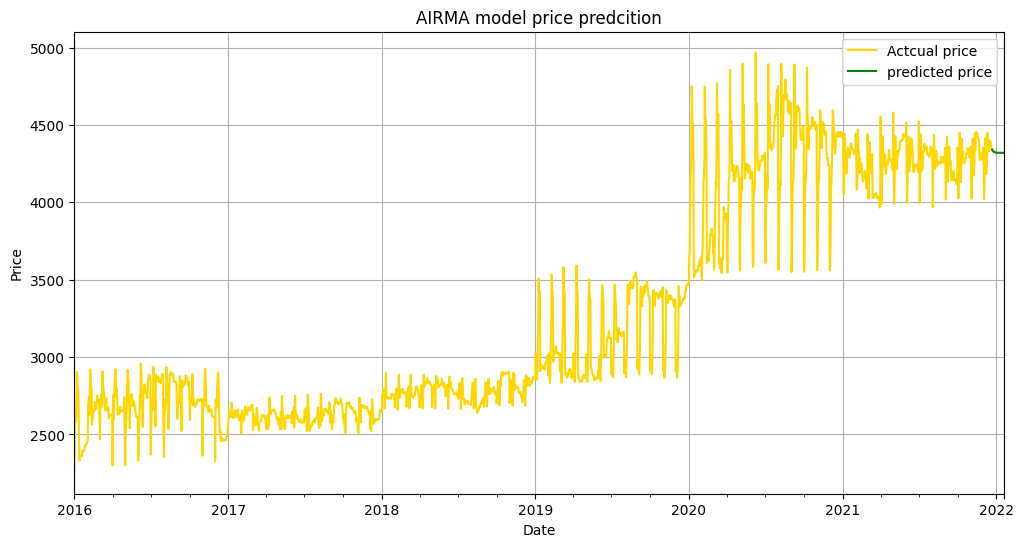

In [32]:
plt.figure(figsize=(12, 6))
df['price'].plot(label="Actcual price",color="gold")
y_pred.plot(label="predicted price",color="green")
plt.legend()
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AIRMA model price predcition")


In [39]:
y_true=df['price']
mse=mean_squared_error(y_true,y_pred)
print(f"mean squared error:{mse}")


mean squared error:14244.606814350764


In [40]:
rmse=np.sqrt(mse)
print(f"root mean squared error:{rmse}")

root mean squared error:119.35077215649157


In [41]:
y_pred = model_arima_fit.predict(start=0, end=len(df)-1)

In [ ]:
plt.figure(figsize=(12, 6))
df['price'].plot(label="Actcual price",color="gold")
y_pred.plot(label="predicted price",color="green")
plt.legend()
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AIRMA model price predcition")


In [42]:
error_percentage=(rmse/df['price'].mean())*100
print(f"error:{error_percentage:.2f}%")


error:3.63%


In [43]:
model_Accuracy= 100-error_percentage
print(f"model accuracy:{model_Accuracy:.2f}%")

model accuracy:96.37%


In [44]:
!pip install prophet

In [45]:
# Prophet
df_prophet=df.reset_index()[['date','price']]
df_prophet.columns=['ds','y']
df_prophet

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [46]:
from prophet import Prophet
model_prophet=Prophet()
model_prophet.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpynsiz3ir/hkv7s0r7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpynsiz3ir/vhtgd2af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94550', 'data', 'file=/tmp/tmpynsiz3ir/hkv7s0r7.json', 'init=/tmp/tmpynsiz3ir/vhtgd2af.json', 'output', 'file=/tmp/tmpynsiz3ir/prophet_modeljfy3jzqa/prophet_model-20250515120135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [47]:
future_df=model_prophet.make_future_dataframe(periods=30)
forecast_df=model_prophet.predict(future_df)
forecast_df.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2207,2022-01-16,4248.793951,4039.570221,4474.778024,4248.003034,4249.298831,9.261375,9.261375,9.261375,-1.390853,-1.390853,-1.390853,10.652228,10.652228,10.652228,0.0,0.0,0.0,4258.055326
2208,2022-01-17,4248.581404,4043.440872,4476.896047,4247.634528,4249.224156,5.767522,5.767522,5.767522,0.187458,0.187458,0.187458,5.580063,5.580063,5.580063,0.0,0.0,0.0,4254.348926
2209,2022-01-18,4248.368857,4040.445404,4470.039045,4247.038257,4249.100189,1.932871,1.932871,1.932871,1.179558,1.179558,1.179558,0.753313,0.753313,0.753313,0.0,0.0,0.0,4250.301728
2210,2022-01-19,4248.156311,4023.954997,4465.262404,4246.697393,4249.036576,-2.827333,-2.827333,-2.827333,0.890251,0.890251,0.890251,-3.717584,-3.717584,-3.717584,0.0,0.0,0.0,4245.328978
2211,2022-01-20,4247.943764,4022.816648,4453.598737,4246.243554,4248.988734,-6.060886,-6.060886,-6.060886,1.672067,1.672067,1.672067,-7.732952,-7.732952,-7.732952,0.0,0.0,0.0,4241.882878


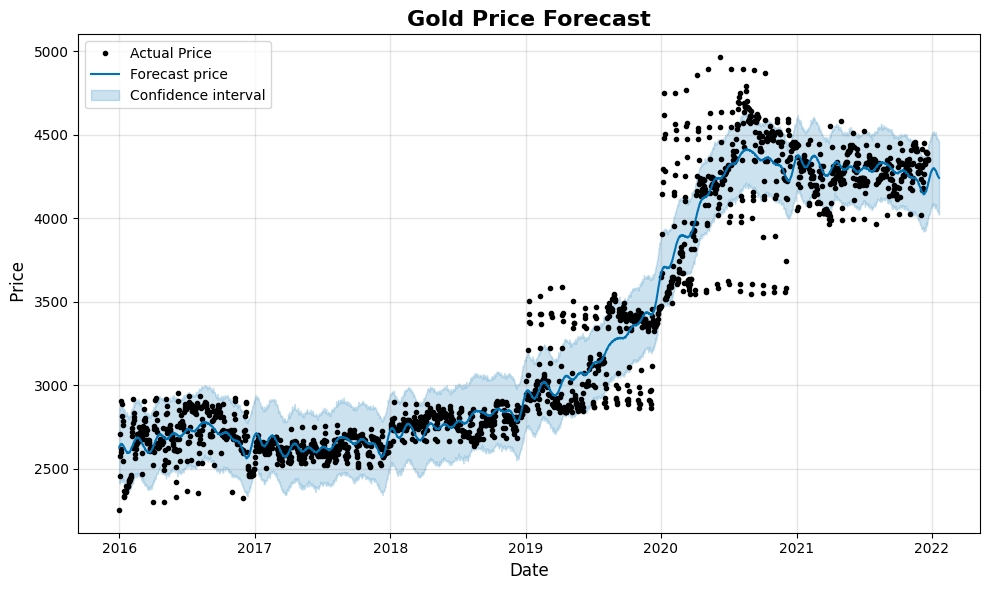

In [48]:
fig = model_prophet.plot(forecast_df)
plt.title("Gold Price Forecast", fontsize=16, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel(" Price", fontsize=12)
plt.grid(True)
plt.legend(["Actual Price","Forecast price","Confidence interval"], loc="upper left")
plt.tight_layout()
plt.show()


In [49]:
y_ture=df_prophet['y']
y_pred = forecast_df.loc[:len(df)-1, 'yhat']

In [ ]:
mse=mean_squared_error(y_ture,y_pred)
mse

In [ ]:
rmse=np.sqrt(mse)
print(rmse)

In [50]:
error_calculationph=(rmse/df['price'].mean())*100
print(f"error:{error_calculationph:.2f}")

error:3.63


In [51]:
Accuarcy_percentage=100-error_calculationph
print(f"model accuarcy{Accuarcy_percentage:.2f}")

model accuarcy96.37


**bold text**
In forecast model buliding for gold price prediction, I Have tried 3 models

Prediction Accuracy (next 30 days):

Linear Regression:r2 is 78%

ARIMA=96.37%

Prophet(meta)=94.86%

best is ARIMA=96.37%